In [ ]:
import os

ROOT = "/content/drive/MyDrive/Deep learning CNN"
os.chdir(ROOT)

In [ ]:
os.listdir()

['car1.jpeg',
 'car_grayscale.jpeg',
 'CNN basics.ipynb',
 'Image understanding.ipynb']

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [ ]:
car1 = mpimg.imread("car1.jpeg")

In [ ]:
car1#reads the img as matrices

array([[[237, 237, 237],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [237, 237, 237]],

       [[237, 237, 237],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [237, 237, 237]],

       [[237, 237, 237],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [237, 237, 237]],

       ...,

       [[216, 216, 216],
        [216, 216, 216],
        [216, 216, 216],
        ...,
        [211, 211, 211],
        [211, 211, 211],
        [211, 211, 211]],

       [[217, 217, 217],
        [217, 217, 217],
        [217, 217, 217],
        ...,
        [213, 213, 213],
        [213, 213, 213],
        [213, 213, 213]],

       [[217, 217, 217],
        [217, 217, 217],
        [217, 217, 217],
        ...,
        [214, 214, 214],
        [214, 214, 214],
        [214, 214, 214]]

In [ ]:
car1.shape

(168, 300, 3)

In [ ]:
type(car1)

numpy.ndarray

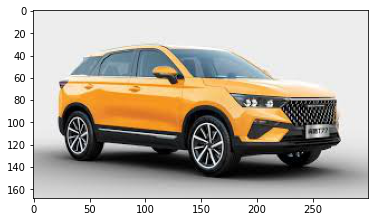

In [ ]:
plt.imshow(car1)

In [ ]:

car1_cv2 = cv2.imread("car1.jpeg")

In [ ]:
# cv2.imshow("image", car1_cv2) # DisabledFunctionError

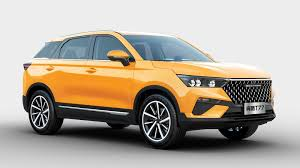

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(car1_cv2)

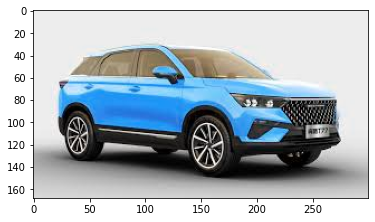

In [ ]:
plt.imshow(car1_cv2) # cv2 reads data as BGR and matplotlib read as RGB

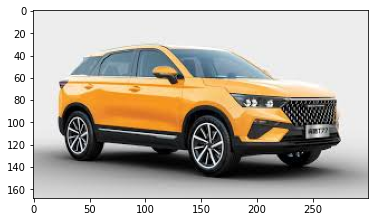

In [ ]:
car1_cv2_BGR_RGB = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(car1_cv2_BGR_RGB)

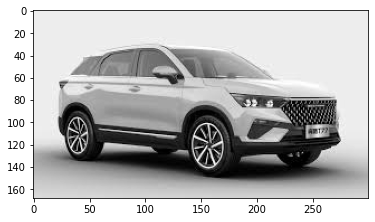

In [ ]:
car1_cv2_BGR_GRAY = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2GRAY)
plt.imshow(car1_cv2_BGR_GRAY, cmap="gray")

In [ ]:
car1_cv2_BGR_GRAY.shape

(168, 300)

In [ ]:
car1_cv2_BGR_GRAY.min(), car1_cv2_BGR_GRAY.max() # min and max pixel intensity of entire pic

(0, 255)

In [ ]:
car1_cv2_BGR_GRAY[0,0] # pixel intensity of 0,0 pixel position

237

In [ ]:
cv2.imwrite("car_grayscale.jpeg", car1_cv2_BGR_GRAY)

True

# Understanding composition of colored image

In [ ]:
def visulize_RGB_channels(imgArray=None, fig_size=(10,7)):
  # splitting the RGB components
  B, G, R = cv2.split(imgArray)

  # zero matrix
  Z = np.zeros(B.shape, dtype=B.dtype)

  # init subplots
  fig, ax = plt.subplots(2,2, figsize=fig_size)

  
  # print(ax.shape)
  [axi.set_axis_off() for axi in ax.ravel()]#ravel does flattenning operation

  ax[0,0].set_title("original image")
  ax[0,0].imshow(cv2.merge((R,G,B)))

  ax[0,1].set_title("red image")
  ax[0,1].imshow(cv2.merge((R,Z,Z)))

  ax[1,0].set_title("green image")
  ax[1,0].imshow(cv2.merge((Z,G,Z)))

  ax[1,1].set_title("blue image")
  ax[1,1].imshow(cv2.merge((Z,Z,B)))

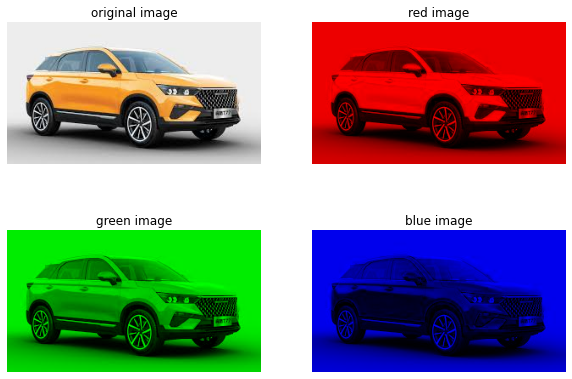

In [ ]:
visulize_RGB_channels(imgArray=car1_cv2)

In [ ]:
random_colored_image = np.random.randint(0, 255, (6,6,3))
random_colored_image.shape

(6, 6, 3)

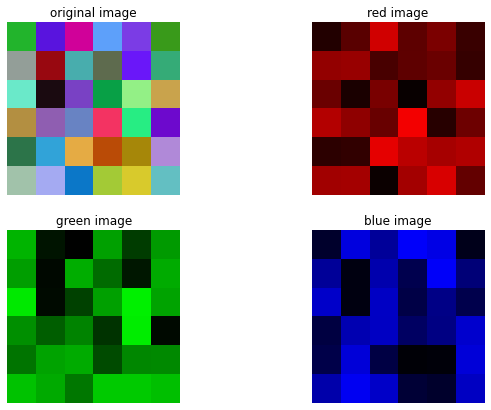

In [ ]:
visulize_RGB_channels(imgArray=random_colored_image)

In [ ]:
random_colored_image[0,0,:]#bgr

array([ 44, 180,  34])

In [ ]:
random_colored_image[-1,-1,:]


array([194, 191,  99])

# Understanding filters

In [ ]:
# sobel filter

sobel = np.array([[1,0,-1], [2,0,-2], [1,0,-1]])

print(sobel)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [ ]:
sobel.T

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

In [ ]:
# example array

example1 = [[0,0,0,255,255,255],
            [0,0,0,255,255,255],
            [0,0,0,255,255,255],
            [0,0,0,255,255,255],
            [0,0,0,255,255,255],
            [0,0,0,255,255,255],]

example1 = np.array(example1)

In [ ]:
# example array

example2 = [[255,255,255,0,0,0],
            [255,255,255,0,0,0],
            [255,255,255,0,0,0],
            [255,255,255,0,0,0],
            [255,255,255,0,0,0],
            [255,255,255,0,0,0],]

example2 = np.array(example2)

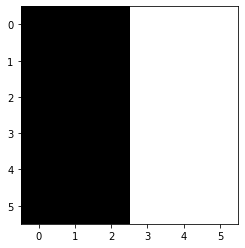

In [ ]:
plt.imshow(example1, cmap="gray")

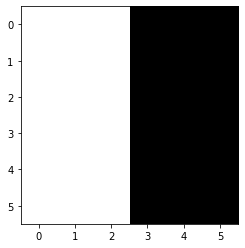

In [ ]:
plt.imshow(example2, cmap="gray")


## applying sobel filter

In [ ]:
def find_edges(imgFilter=None, picture=None):
  # extract row and col of input pic
  p_row, p_col = picture.shape # 

  k = imgFilter.shape[0] # k = 3

  temp = list() # to store final result

  stride = 1
  # resultant rows and col
  final_cols = (p_col - k)//stride  + 1
  final_rows = (p_row - k)//stride  + 1

  # take vertically down stride across row by row
  for v_stride in range(final_rows):
    # take horizontally right stride across col by col
    for h_stride in range(final_cols):
      target_area_of_pic = picture[v_stride: v_stride + k, h_stride: h_stride + k]
      temp.append(sum(sum(imgFilter * target_area_of_pic)))

  return np.array(temp).reshape(final_rows, final_cols)

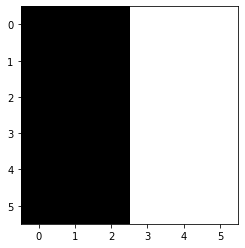

In [ ]:
plt.imshow(example1, cmap="gray")


In [ ]:
example1

array([[  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255]])

In [ ]:
sum(sum(example1))

4590

In [ ]:
result = find_edges(sobel, example1)
result

array([[    0, -1020, -1020,     0],
       [    0, -1020, -1020,     0],
       [    0, -1020, -1020,     0],
       [    0, -1020, -1020,     0]])

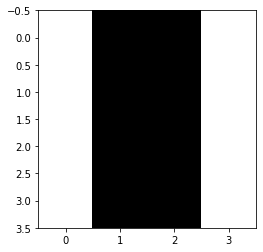

In [ ]:
plt.imshow(result, cmap="gray")

In [ ]:
result2 = find_edges(sobel, example2)
result2

array([[   0, 1020, 1020,    0],
       [   0, 1020, 1020,    0],
       [   0, 1020, 1020,    0],
       [   0, 1020, 1020,    0]])

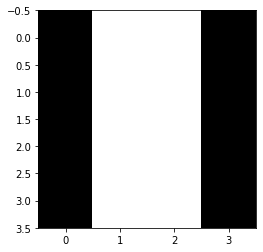

In [ ]:
plt.imshow(result2, cmap="gray")

In [ ]:
result_T = find_edges(sobel.T, example1)
result_T

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

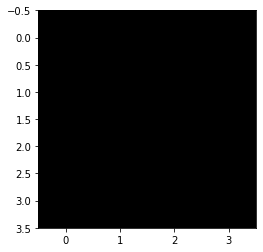

In [ ]:
plt.imshow(result_T, cmap="gray")


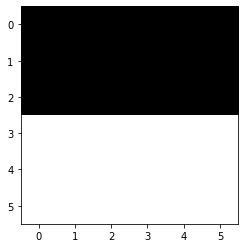

In [ ]:
example1_T = example1.T
plt.imshow(example1_T, cmap="gray")


In [ ]:
result_T = find_edges(sobel.T, example1_T)
result_T

array([[    0,     0,     0,     0],
       [-1020, -1020, -1020, -1020],
       [-1020, -1020, -1020, -1020],
       [    0,     0,     0,     0]])

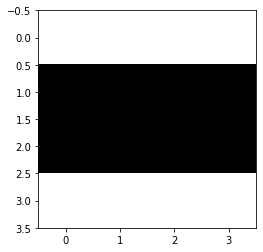

In [ ]:
plt.imshow(result_T, cmap="gray")


In [ ]:
result_T = find_edges(sobel, example1_T)
result_T

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

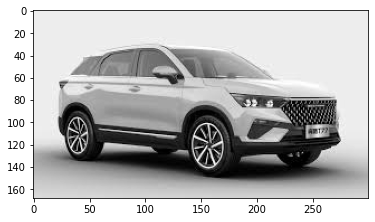

In [ ]:

car1_cv2_BGR_GRAY = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2GRAY)
plt.imshow(car1_cv2_BGR_GRAY, cmap="gray")

In [ ]:
result_car = find_edges(sobel, car1_cv2_BGR_GRAY)
result_car

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

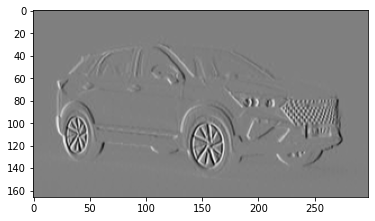

In [ ]:
plt.imshow(result_car, cmap="gray")

In [ ]:
result_car = find_edges(sobel.T, car1_cv2_BGR_GRAY)
result_car

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [-12, -12, -12, ..., -16, -16, -16],
       [-12, -12, -12, ..., -16, -16, -16],
       [ -4,  -4,  -4, ..., -12, -12, -12]])

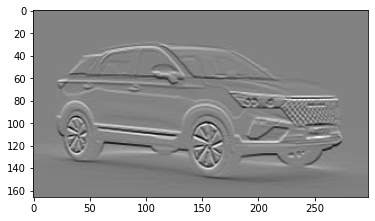

In [ ]:
plt.imshow(result_car, cmap="gray")

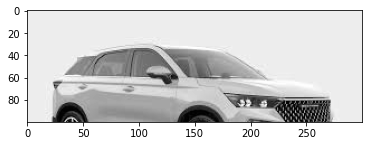

In [ ]:
plt.imshow(car1_cv2_BGR_GRAY[0:100, 0:300], cmap="gray")

Text(0.5, 0.98, 'testing')

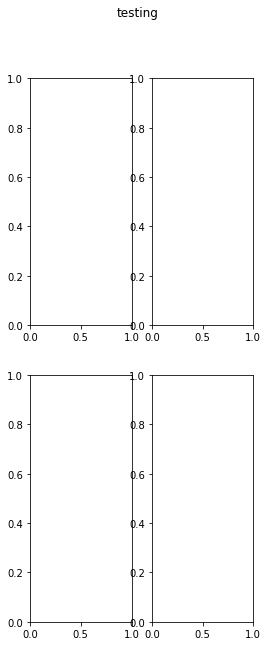

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(4,10))
fig.suptitle("testing")

In [ ]:
type(fig)

matplotlib.figure.Figure

In [ ]:
# fig.

In [ ]:
ones = np.ones((3,3))
ones

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

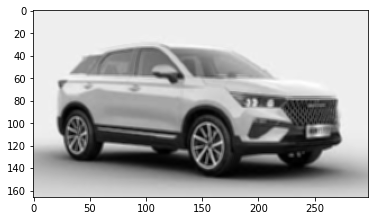

In [ ]:
result_car = find_edges(ones, car1_cv2_BGR_GRAY)
plt.imshow(result_car, cmap="gray")

In [ ]:
# example array

example1 = [[0,0,0,0,255,255,255,255,0,0,0,0,],
            [0,0,0,0,255,255,255,255,0,0,0,0,],
            [0,0,0,0,255,255,255,255,0,0,0,0,],
            [0,0,0,0,255,255,255,255,0,0,0,0,],
            [0,0,0,0,255,255,255,255,255,255,255,255],
            [0,0,0,0,255,255,255,255,255,255,255,255],
            [0,0,0,0,255,255,255,255,255,255,255,255],
            [0,0,0,0,255,255,255,255,0,0,0,0,],
            [0,0,0,0,255,255,255,255,0,0,0,0,],
            [0,0,0,0,255,255,255,255,0,0,0,0,],
            [0,0,0,0,255,255,255,255,0,0,0,0,],
            [0,0,0,0,255,255,255,255,0,0,0,0,],
            ]

example1 = np.array(example1)

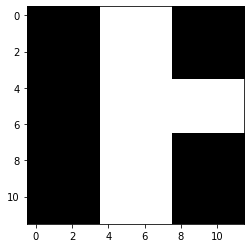

In [ ]:
# example1_T = example1.T
plt.imshow(example1, cmap="gray")


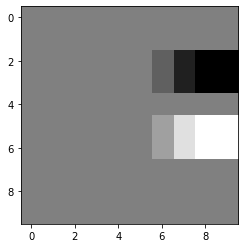

In [ ]:
result = find_edges(sobel.T, example1)
plt.imshow(result, cmap="gray")

In [ ]:
result.shape

(10, 10)

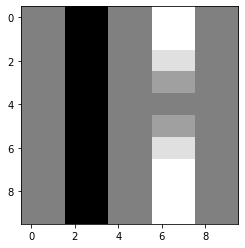

In [ ]:
result = find_edges(sobel, example1)
plt.imshow(result, cmap="gray")